## Problem statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation 


This is an important stage in any machine learning process.
In essence, it involves generating as many ideas as possible about possible influences on the target variable through brainstorming.
It makes it possible for us to examine the available data more successfully and quickly.

To prevent generating biased hypotheses, we should construct hypotheses prior to viewing the data.
Below is a list of the hypotheses that are based on the issue statement.

- Item Visibility: Items with higher visibility within the store may experience higher sales as they are more likely to catch the attention of shoppers.

- Item MRP (Maximum Retail Price): Items with higher MRPs may experience lower sales as they could be perceived as expensive or luxurious, impacting consumer demand.

- Outlet Establishment Year: Stores that have been established for a longer duration may have higher sales due to brand loyalty and customer trust.

- Outlet Location Type: Stores located in urban areas or areas with higher population density may experience higher sales due to higher foot traffic.

- Outlet Type: Supermarkets may experience higher sales compared to grocery stores or other types of outlets due to their larger inventory and variety of products.

## Null Hypothesis
- As the data has continuous target variable Regression is best fit model for sales prediction (Linear Regression)

## Alternate Hypothesis
- Regression will not be used for prediction


##  Loading Packages 

In [451]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split,KFold
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


## Loading the Dataset

In [382]:
df=pd.read_csv("Train.csv")

df 

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

##  Exploratory Data Analysis

In [383]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [385]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [386]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Missing Value Treatment

In [387]:
#Replacing NULL values in Numerical columns using Median
#Replacing NULL values in Categoical columns using Mode
df.fillna(value=df['Item_Weight'].median(),inplace =True)
df.fillna(value=df['Outlet_Size'].mode(),inplace =True)
df.fillna(value=df['Item_Outlet_Sales'].mode(),inplace =True)

In [388]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [389]:
df.duplicated().sum()

0

## Using the boxplot to check outliers 

<Axes: >

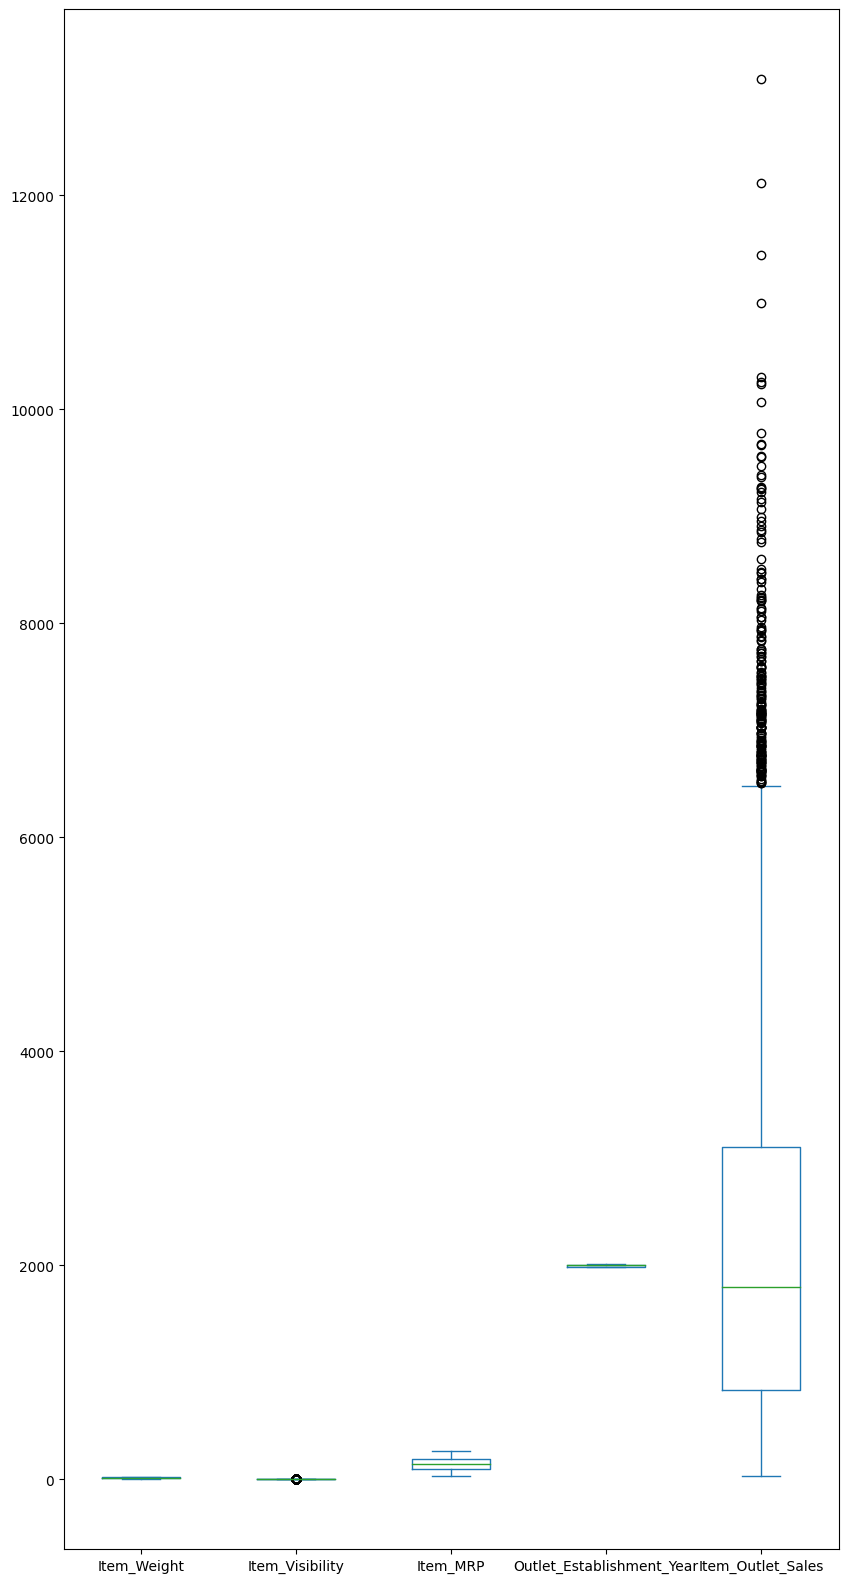

In [390]:
df.plot(kind='box',figsize=(10,20))

<Axes: xlabel='Item_Weight'>

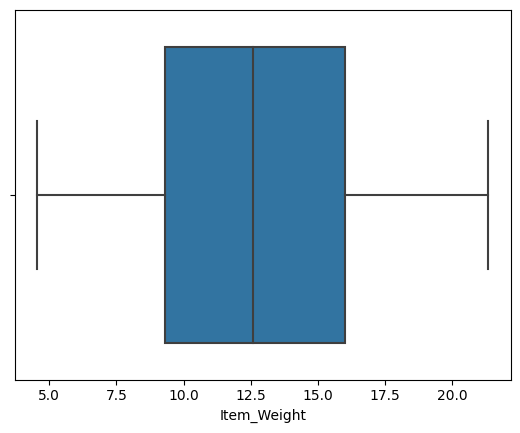

In [391]:
sns.boxplot(x=df['Item_Weight'])

<Axes: xlabel='Item_Visibility'>

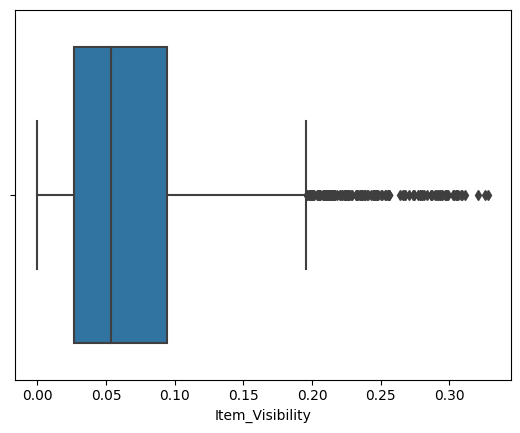

In [392]:
sns.boxplot(x=df['Item_Visibility'])

## Removing outliers using IQR

<Axes: xlabel='Item_Visibility'>

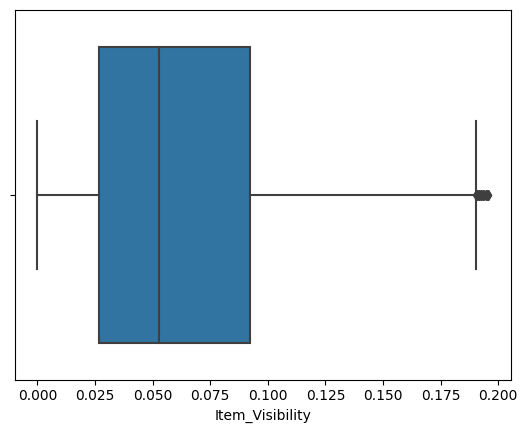

In [393]:
Q1=df['Item_Visibility'].quantile(.25)
Q3=df['Item_Visibility'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Visibility']>LL)&(df['Item_Visibility']<HL)]
sns.boxplot(x=data_no_outliers['Item_Visibility']) 

<Axes: xlabel='Item_MRP'>

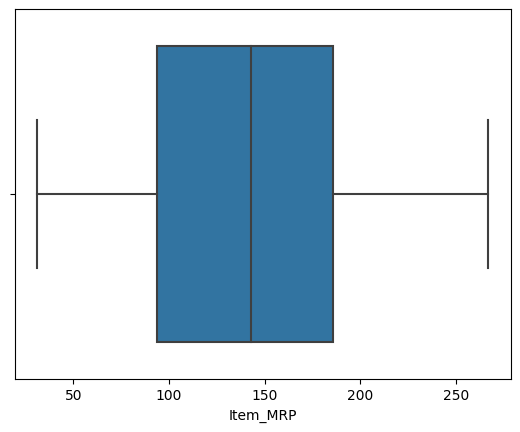

In [394]:
sns.boxplot(x=df['Item_MRP'])

<Axes: xlabel='Outlet_Establishment_Year'>

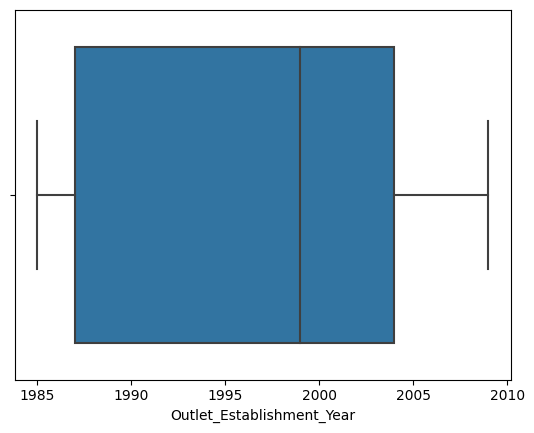

In [395]:
sns.boxplot(x=df['Outlet_Establishment_Year'])

<Axes: xlabel='Item_Outlet_Sales'>

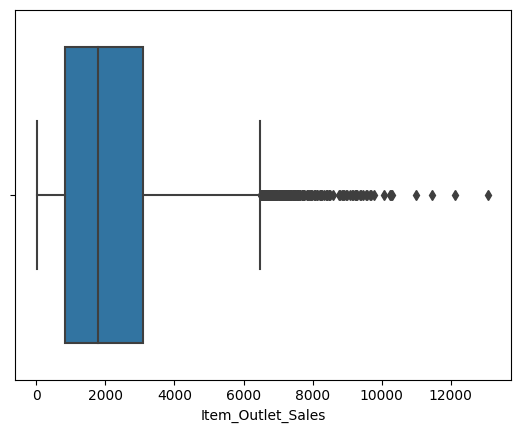

In [396]:
sns.boxplot(x=df['Item_Outlet_Sales'])

## Removing outliers using IQR

<Axes: xlabel='Item_Outlet_Sales'>

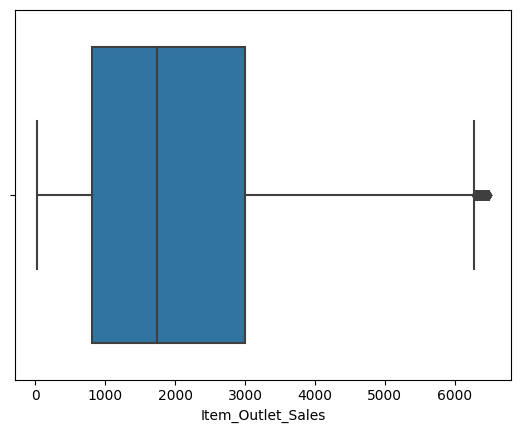

In [397]:
Q1=df['Item_Outlet_Sales'].quantile(.25)
Q3=df['Item_Outlet_Sales'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Outlet_Sales']>LL)&(df['Item_Outlet_Sales']<HL)]
sns.boxplot(x=data_no_outliers['Item_Outlet_Sales']) 

In [398]:
df1=df.copy()
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998        12.6               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002        12.6               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

## Getting the profile report for feature engineering

In [403]:
!pip install dtale
!pip install ydata-profiling


In [404]:
import pandas as pd
from ydata_profiling import ProfileReport


In [405]:
# Generate the profiling report
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)
profile.to_file("ydata_profiling_report.html")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [406]:
#Describing the data
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [407]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        12.6               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## EDA

## Correlation matrix

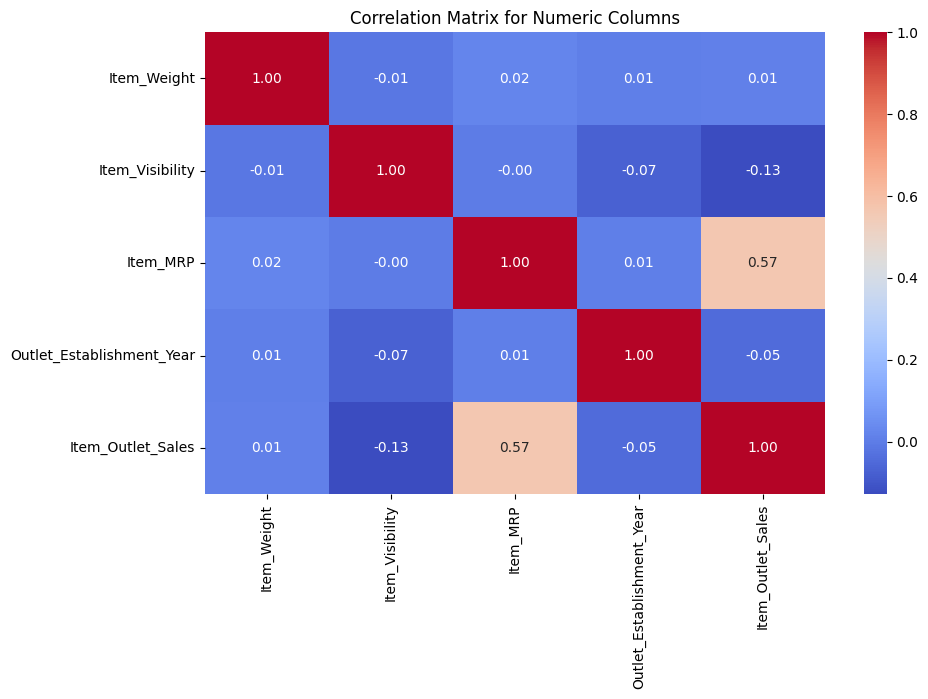

In [408]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()


### Inference
The correlation matrix provides insights into the relationships between numeric columns in the dataset. Here's how to interpret it:

1. **Positive Correlation**: A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. For example, if the correlation coefficient between two variables is 0.8, it suggests a strong positive relationship between them.

2. **Negative Correlation**: A value close to -1 indicates a strong negative correlation, implying that as one variable increases, the other variable tends to decrease. For instance, if the correlation coefficient between two variables is -0.6, it indicates a strong negative relationship between them.

3. **Weak Correlation**: A value close to 0 suggests a weak correlation, meaning that there is little to no linear relationship between the variables.

By analyzing the correlation matrix and associated heatmap:
- You can identify pairs of features that are highly correlated, which may indicate redundancy in the data.
- Strong correlations (either positive or negative) between features may provide insights into underlying patterns in the data or potential dependencies between variables.
- Features with low or near-zero correlations with the target variable may have less predictive power and could potentially be excluded from predictive modeling to simplify the model without sacrificing performance.

## Pie chart for Outlet_Type

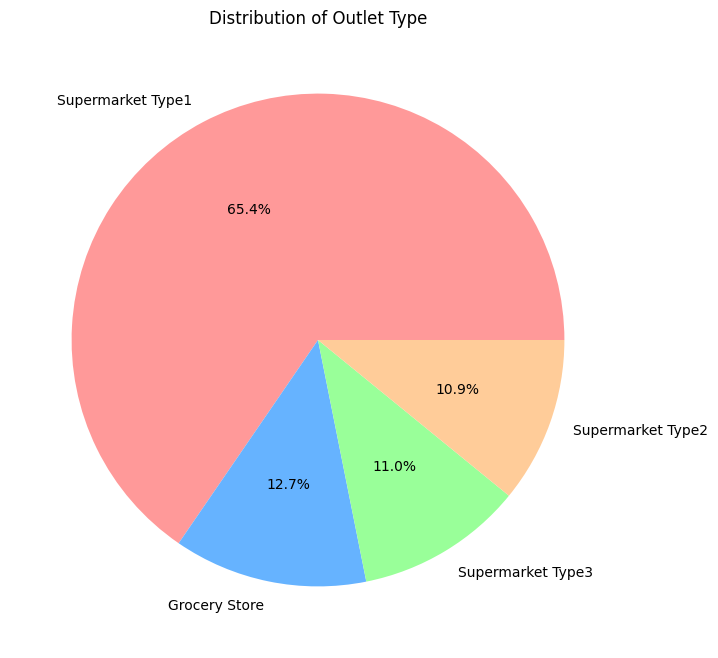

In [409]:
plt.figure(figsize=(8, 8))
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99', '#ffcc99'])
plt.title('Distribution of Outlet Type')
plt.ylabel('')
plt.show()

### Inference
The pie chart visualizes the distribution of outlet types in the dataset. Here's the interpretation:

- **Grocery Store**: This outlet type comprises the smallest proportion, representing 12.7% of the total.
- **Supermarket Type1**: The majority of outlets fall under this category, accounting for 65.4% of the total.
- **Supermarket Type2**: This outlet type constitutes 10.9% of the total, indicating a significant presence but less than Supermarket Type1.
- **Supermarket Type3**: Similar to Supermarket Type2, this category accounts for 11.0% of the total, also making a notable contribution.

In summary, the visualization provides a clear breakdown of the distribution of outlet types, highlighting the prevalence of Supermarket Type1, followed by Supermarket Type2 and Type3, with Grocery Store having the smallest share.

## Pie chart for Item_Fat_Content

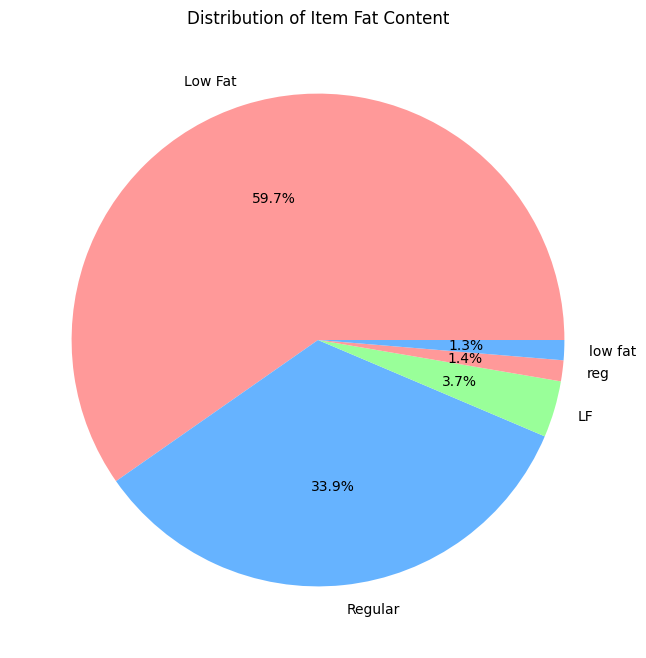

In [410]:
plt.figure(figsize=(8, 8))
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Item Fat Content')
plt.ylabel('')
plt.show()


### Inference
The pie chart illustrates the distribution of item fat content in the dataset. Here's the interpretation:

- **Low Fat**: This category constitutes the majority, representing 59.7% of the total.
- **Regular**: The proportion of items labeled as "Regular" is slightly smaller, accounting for 33.9% of the total.

In summary, the visualization provides insights into the distribution of item fat content, highlighting that a larger portion of items are labeled as "Low Fat" compared to "Regular".

## Cat plot of Item_Outlet_Sales by Outlet_Type and Item_Fat_Content

<Figure size 1200x600 with 0 Axes>

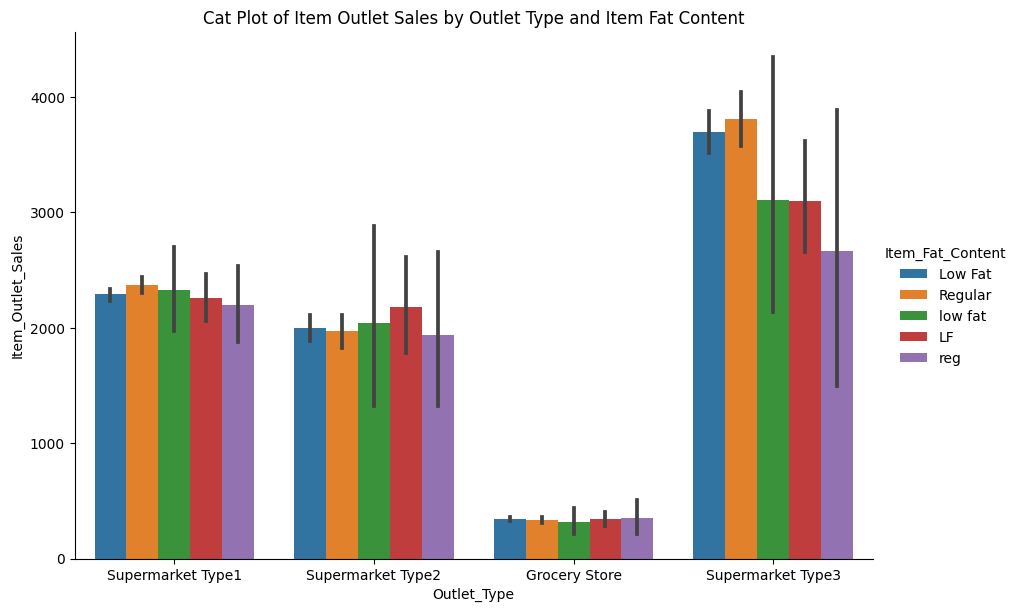

In [411]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', kind='bar', data=df, height=6, aspect=1.5)
plt.title('Cat Plot of Item Outlet Sales by Outlet Type and Item Fat Content')
plt.show()


#### Hypothesis Accepted: Supermarkets may experience higher sales compared to grocery stores or other types of outlets due to their larger inventory and variety of products.

### Inference
The categorical plot (catplot) visualizes the relationship between item outlet sales, outlet type, and item fat content. Here's the interpretation:

- **Outlet Type**: The x-axis represents different types of outlets.
- **Item Outlet Sales**: The y-axis shows the average sales of items in each outlet type.
- **Item Fat Content**: The hue differentiates between "Low Fat" and "Regular" items within each outlet type.

The visualization helps to discern how item outlet sales vary across different outlet types, considering the distinction between low-fat and regular items.

## Swarm plot of Item_Visibility vs. Item_Type

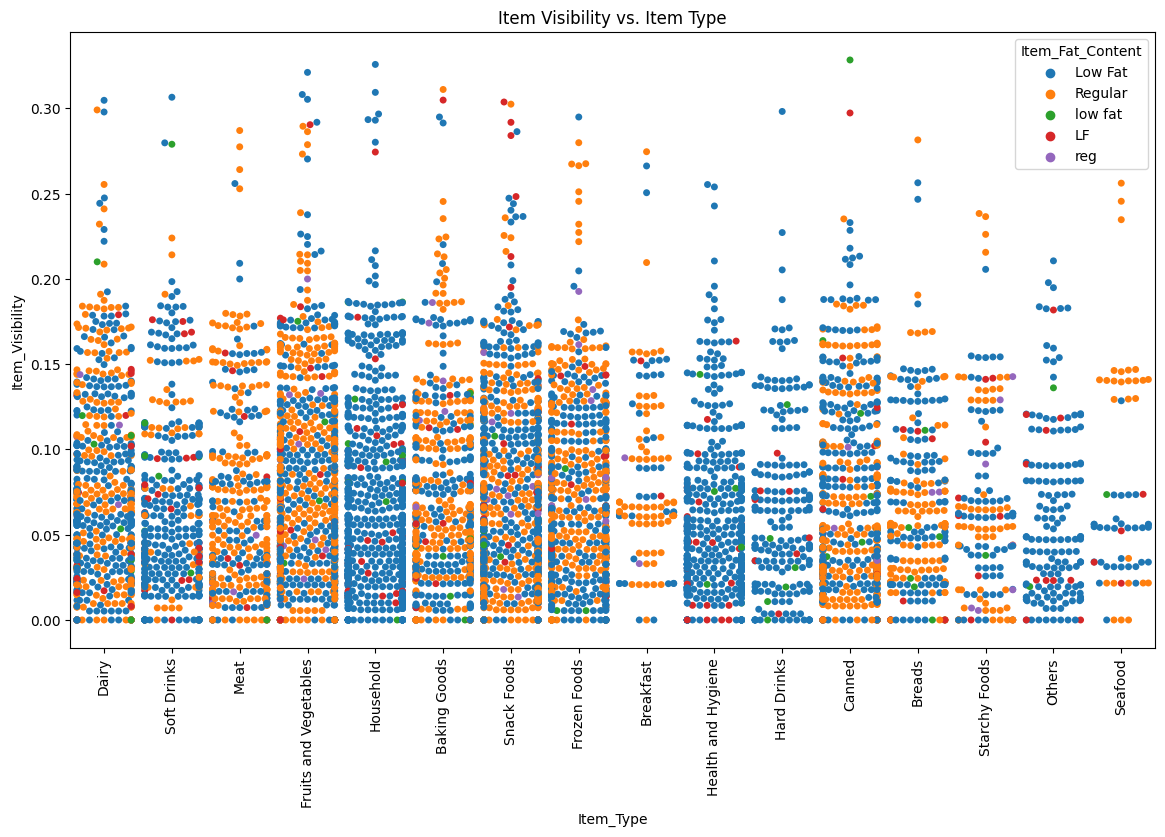

In [412]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Item_Type', y='Item_Visibility', hue='Item_Fat_Content', data=df)
plt.xticks(rotation=90)
plt.title('Item Visibility vs. Item Type')
plt.show()


#### Hypothesis Satisfied: Item Visibility: Items with higher visibility within the store may experience higher sales as they are more likely to catch the attention of shoppers.

### Inference
The swarm plot illustrates the relationship between item visibility, item type, and item fat content. Here's what the visualization indicates:

- **Item Type**: The x-axis displays different types of items.
- **Item Visibility**: The y-axis represents the visibility of items.
- **Item Fat Content**: The hue distinguishes between "Low Fat" and "Regular" items within each item type.

This visualization helps to understand how item visibility varies across different types of items, considering the fat content of each item.

## Bar plot of average Item_Outlet_Sales by Outlet_Location_Type

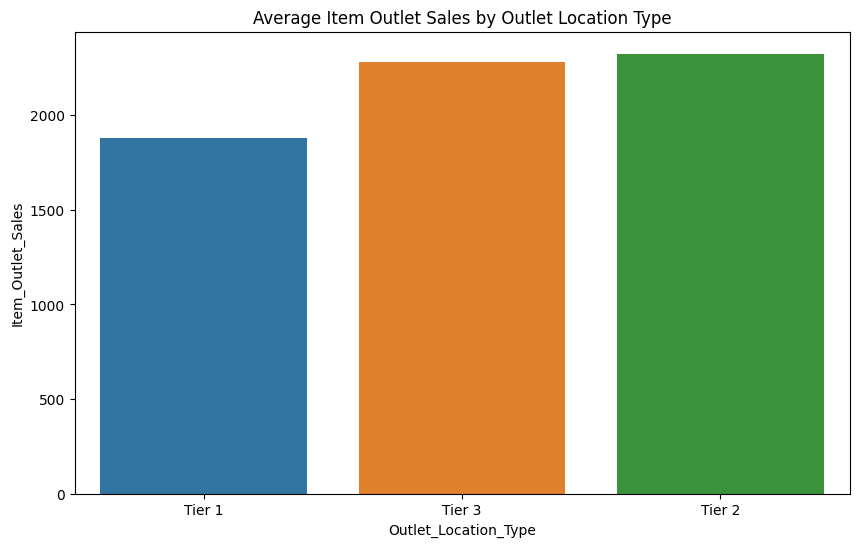

In [413]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, ci=None)
plt.title('Average Item Outlet Sales by Outlet Location Type')
plt.show()


#### Hypothesis accepted: Stores located in urban areas or areas with higher population density may experience higher sales due to higher foot traffic.



### Inference
The bar plot illustrates the average item outlet sales based on the outlet location type. Here's the inference:

- **Outlet Location Type**: The x-axis displays different types of outlet locations.
- **Item Outlet Sales**: The y-axis represents the average sales amount for items in each outlet location type.

From the visualization, we can observe that outlet location type 1 tends to have higher average sales compared to the other two types. However, outlet location type 3 has the lowest average sales among the three types. This suggests that the location of the outlet might influence the sales performance.

## Line plot of Outlet_Establishment_Year vs. Item_Outlet_Sales

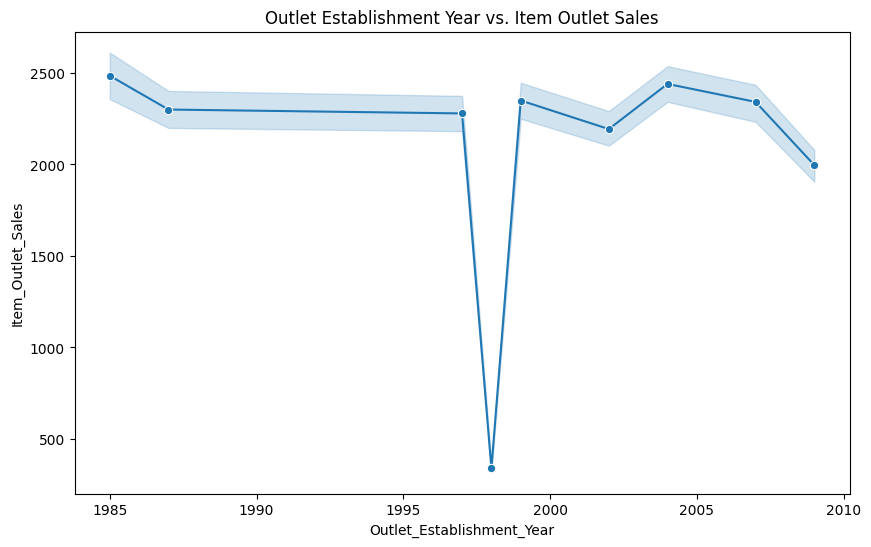

In [414]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, marker='o')
plt.title('Outlet Establishment Year vs. Item Outlet Sales')
plt.show()


#### Hypothesis Accepted: Stores that have been established for a longer duration may have higher sales due to brand loyalty and customer trust.

### Inference
The line plot represents the relationship between the outlet establishment year and item outlet sales. Here's the inference:

- **Outlet Establishment Year**: The x-axis displays the years when the outlets were established.
- **Item Outlet Sales**: The y-axis represents the sales amount for items in each establishment year.

From the visualization, it appears that there is no clear trend between the outlet establishment year and item outlet sales. However, there seems to be a slight decrease in sales in recent years, indicating that newer outlets might have slightly lower sales compared to older ones.

## Scatter plot of Item_MRP vs. Item_Outlet_Sales

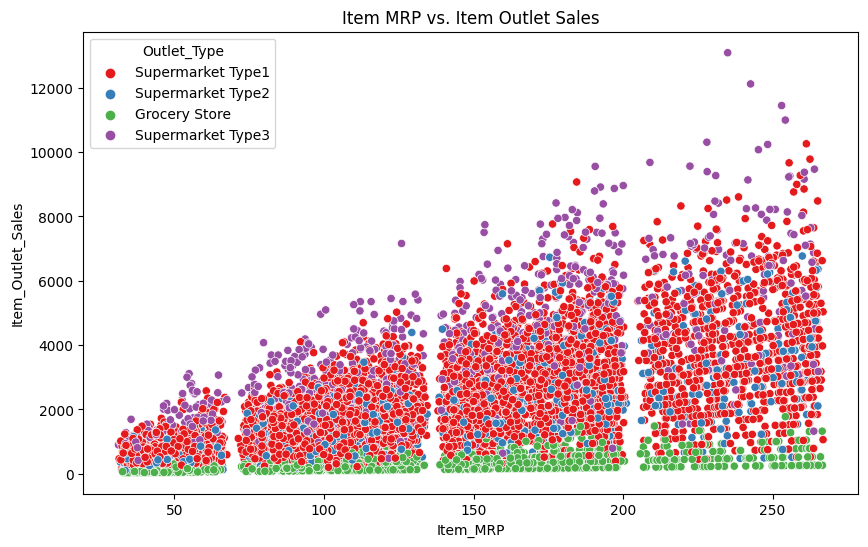

In [415]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', palette='Set1', data=df)
plt.title('Item MRP vs. Item Outlet Sales')
plt.show()


#### Hypothesis Rejected: Higher the MRP more sales in various outlet

### Inference
The scatter plot illustrates the relationship between the item maximum retail price (MRP) and item outlet sales, with each point color-coded by the outlet type. Here's the inference:

- **Item MRP**: The x-axis represents the maximum retail price of the item.
- **Item Outlet Sales**: The y-axis denotes the sales amount for items.
- **Outlet Type**: Different colors represent different types of outlets.

From the visualization, it can be observed that:

- Generally, there is a positive correlation between item MRP and item outlet sales, indicating that higher-priced items tend to have higher sales.
- The scatter plot also suggests that the relationship between item MRP and outlet sales varies across different outlet types. Some outlet types show a more pronounced increase in sales with higher MRP, while others have a more scattered distribution.
- Overall, the scatter plot provides insights into the relationship

## Count plot for categorical features

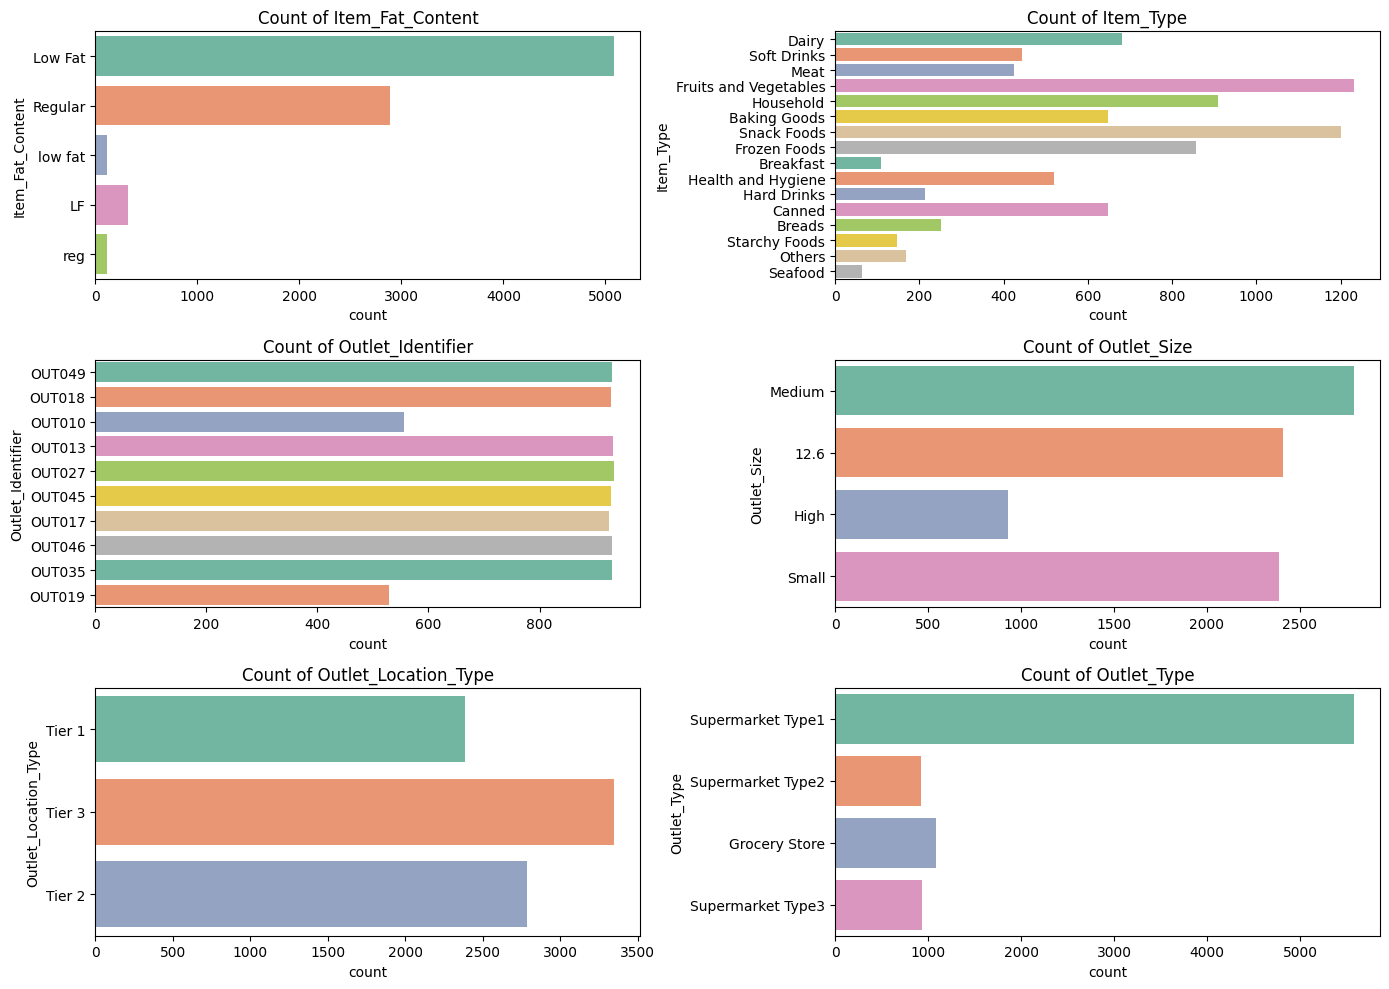

In [416]:
cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[feature], palette='Set2')
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()


### Inference
The count plots display the distribution of categorical features within the dataset. Here are the inferences drawn from the visualization:

1. **Item Fat Content**: The majority of items are categorized as either 'Low Fat' or 'Regular', with 'Low Fat' being slightly more prevalent.
2. **Item Type**: 'Fruits and Vegetables' and 'Snack Foods' are the most common item types, followed by 'Household' and 'Frozen Foods'.
3. **Outlet Identifier**: The count of items across different outlet identifiers varies, suggesting that some outlets may have more sales records than others.
4. **Outlet Size**: Most outlets are categorized as 'Medium', followed by 'Small' and 'High'. However, there is also a significant proportion of outlets with missing size information.
5. **Outlet Location Type**: The count is highest for outlets located in 'Tier 3' locations, followed by 'Tier 2' and 'Tier 1'.
6. **Outlet Type**: 'Supermarket Type1' is the most prevalent outlet type, followed by 'Grocery Store', 'Supermarket Type3', and 'Supermarket Type2'.

These visualizations provide insights into the distribution of categorical features within the dataset, which can be valuable for understanding the data characteristics and potentially informing decision-making processes.

## Distribution of numerical features

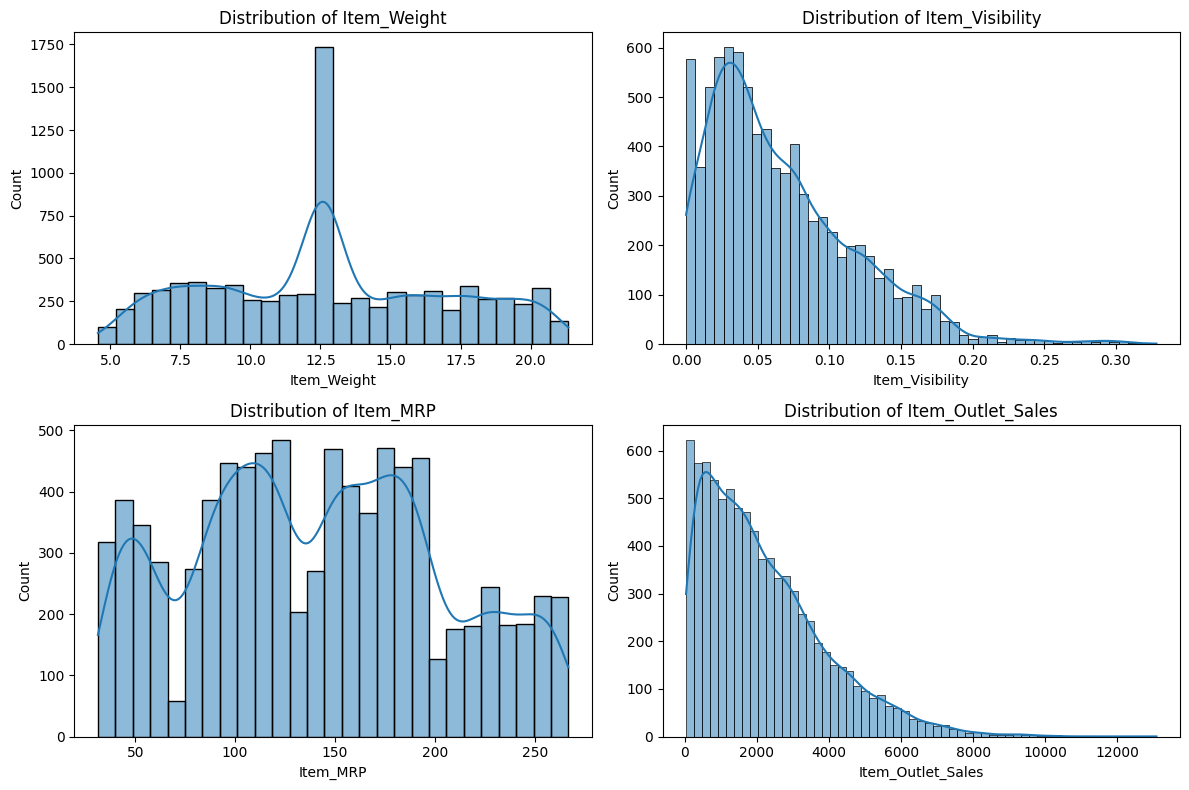

In [417]:
num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


### Inference
The histograms display the distribution of numerical features in the dataset. Here are the inferences drawn from the visualizations:

1. **Item Weight**: The distribution of item weights appears to be relatively uniform, with some fluctuations across different weight ranges.
2. **Item Visibility**: The distribution of item visibility is right-skewed, indicating that most items have low visibility, with a few outliers having higher visibility.
3. **Item MRP (Maximum Retail Price)**: The distribution of item MRP is multimodal, suggesting that there are distinct groups of items with different price ranges.
4. **Item Outlet Sales**: The distribution of item outlet sales is also right-skewed, indicating that a majority of items have relatively lower sales, with a few items having significantly higher sales.

These visualizations provide insights into the distributional characteristics of numerical features in the dataset, which can be useful for understanding the variability and range of values present in the data.

## Relationship between Item_Type and Item_Outlet_Sales

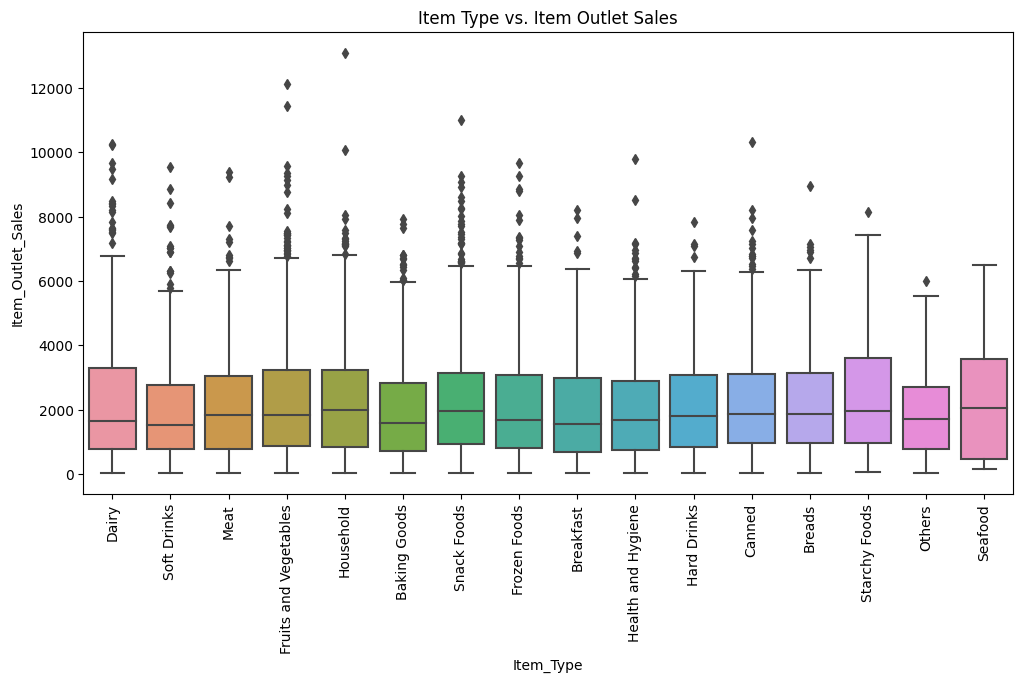

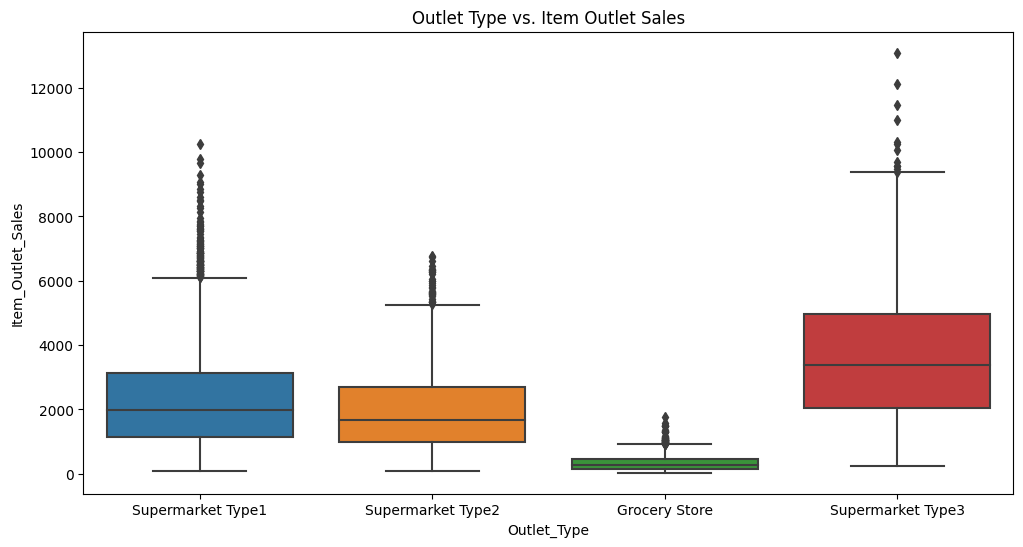

In [418]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Item Type vs. Item Outlet Sales')
plt.show()

# Outlet Type vs. Item Outlet Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Type vs. Item Outlet Sales')
plt.show()


### Inference
From the boxplots:

1. **Item Type vs. Item Outlet Sales**: There is variation in sales across different item types. Some item types have a wider range of sales, while others have a more concentrated distribution. This indicates that the type of item may influence its sales performance.
   
2. **Outlet Type vs. Item Outlet Sales**: The boxplot reveals variation in sales across different outlet types. Certain types of outlets tend to have higher median sales compared to others. This suggests that the outlet type could be a significant factor affecting item sales, with some types of outlets potentially being more effective at driving sales than others.

## Checking the distribution of 'Item_Outlet_Sales' column

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

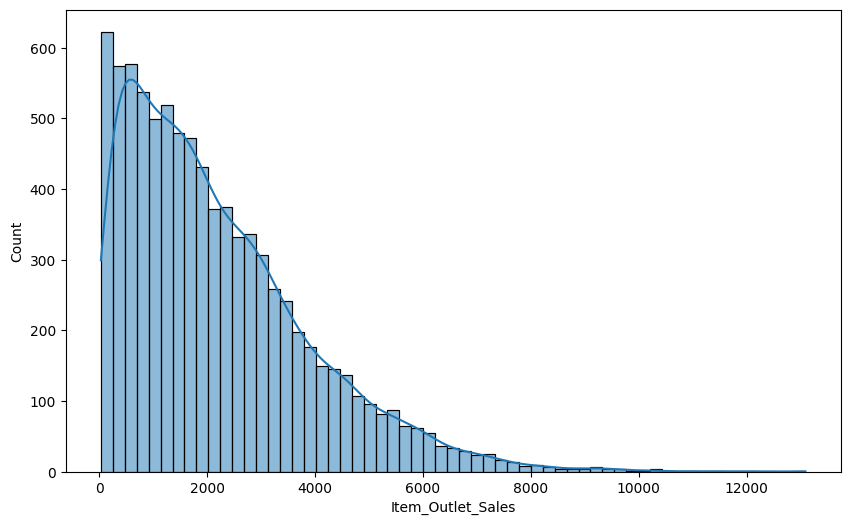

In [419]:
plt.figure(figsize = (10,6))
sns.histplot(data = df1, x = 'Item_Outlet_Sales', kde = True)

<Axes: xlabel='Item_Outlet_Sales'>

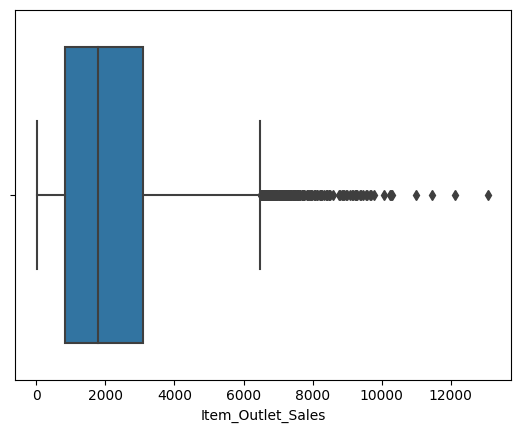

In [420]:
sns.boxplot(x=df1['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales'>

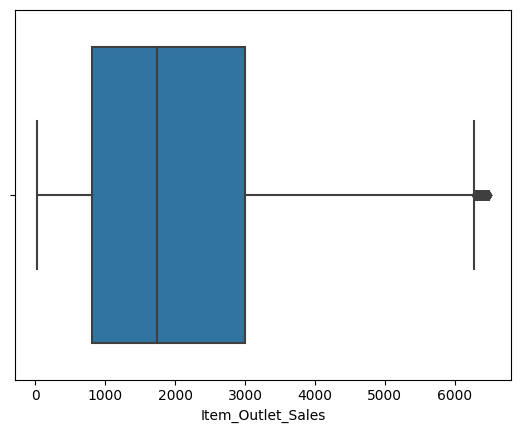

In [421]:
Q1=df['Item_Outlet_Sales'].quantile(.25)
Q3=df['Item_Outlet_Sales'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Outlet_Sales']>LL)&(df['Item_Outlet_Sales']<HL)]
sns.boxplot(x=data_no_outliers['Item_Outlet_Sales']) 

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

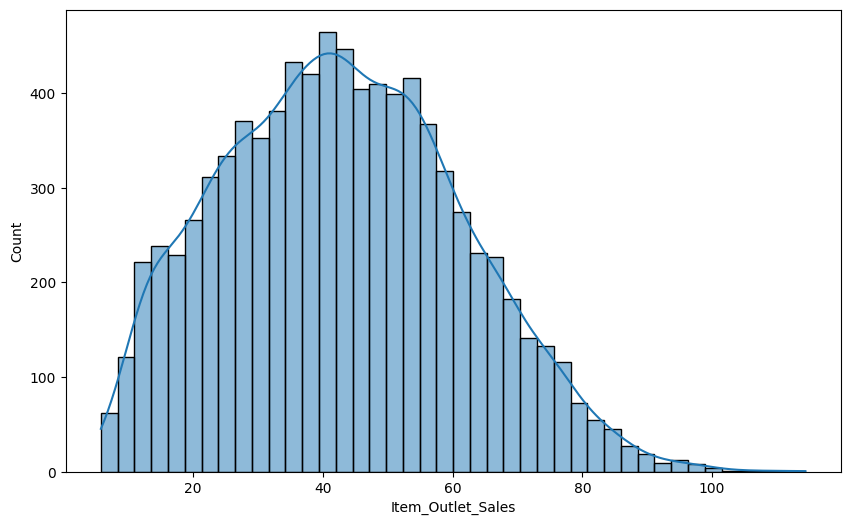

In [422]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)
df1['Item_Outlet_Sales'] = df1['Item_Outlet_Sales'].map(sqrt_transformation)
# After fixing skewness

plt.figure(figsize = (10,6))
sns.histplot(data = df1, x = 'Item_Outlet_Sales', kde = True)

In [423]:
categorical_train = df1.select_dtypes(include = 'object')
numerical_train= df1.select_dtypes(exclude = 'object')
print(f"There are {len(categorical_train.columns)} Categorical Attributes")
print(f"There are {len(numerical_train.columns)} Numerical Attributes")

There are 7 Categorical Attributes
There are 5 Numerical Attributes


In [424]:
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998        12.6               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002        12.6               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          61.115775  
1     Supermarket Type2          21.057607  
2     Supermarket Type1          45.795961  
3         Grocery Store          27.062520  
4     Supermarket Type1          31.538947  
...                 ...                ...  
8518  Supermarket Type1          52.710373  
8519  Supermarket Type1          23.436830  
8520  Supermarket Type1          34.541477  
8521  Supermarket Type2          42.960419  
8522  Supermarket Type1          27.670743  

[8523 rows x 12 columns]

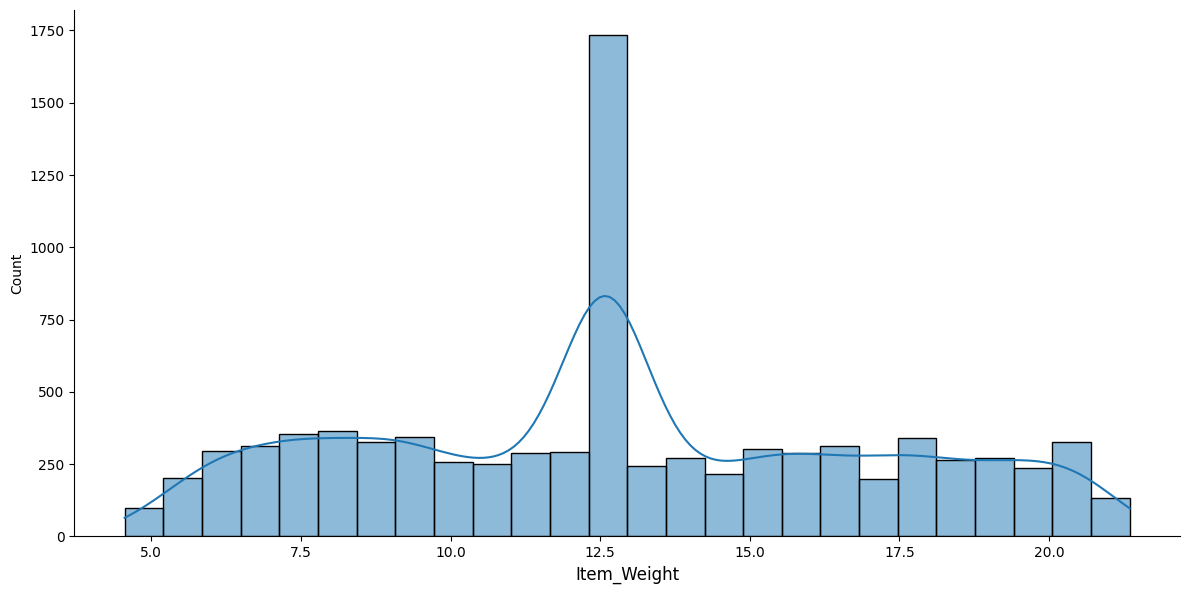

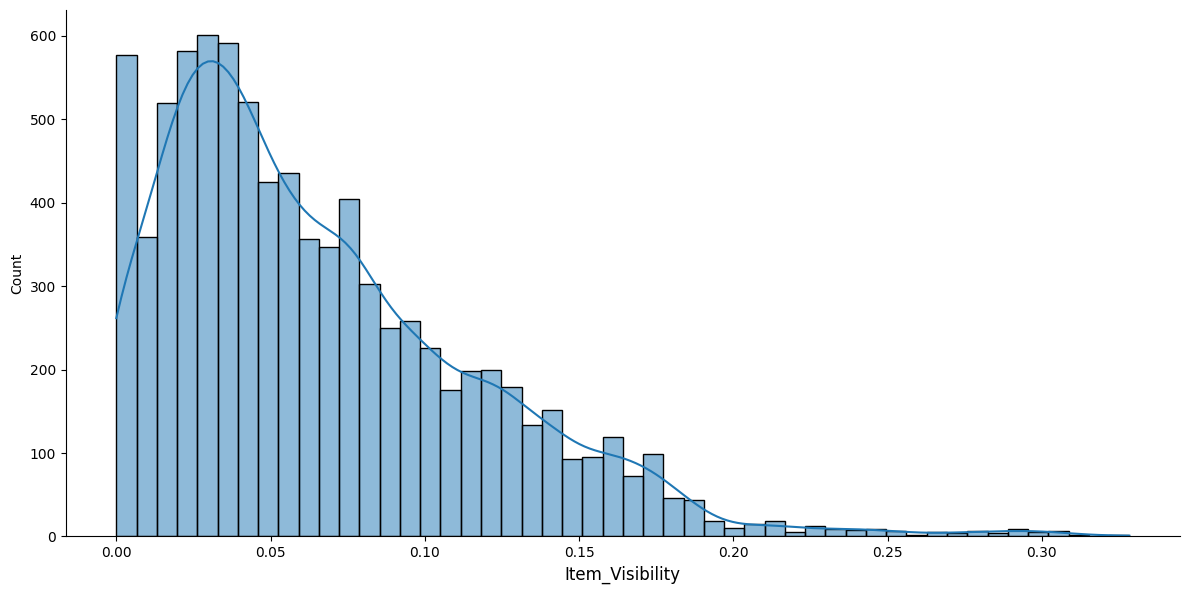

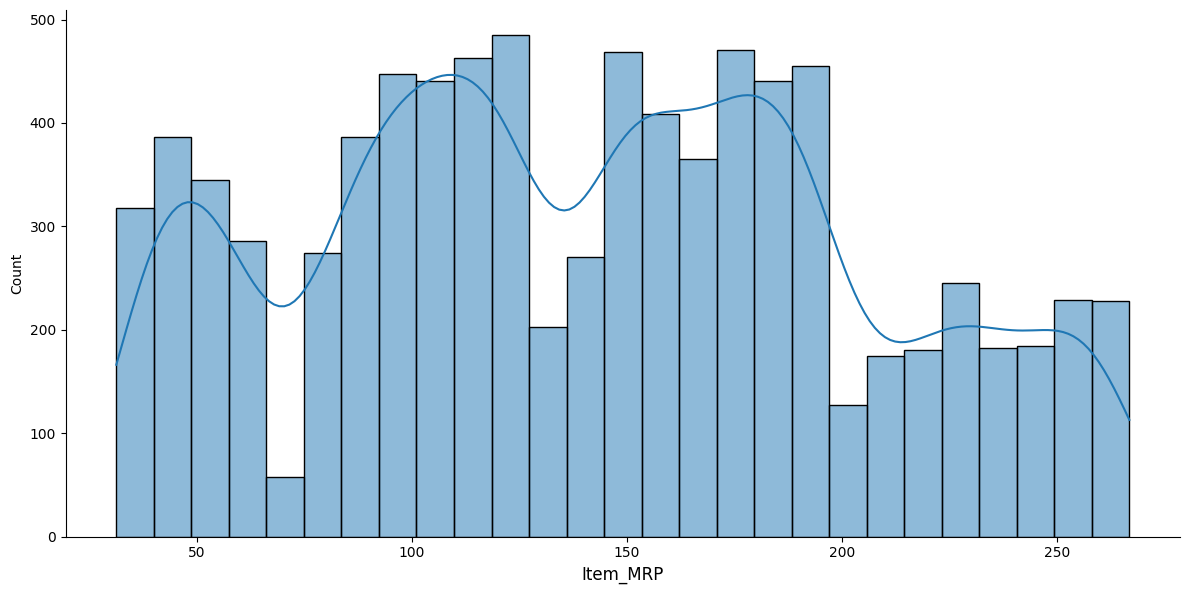

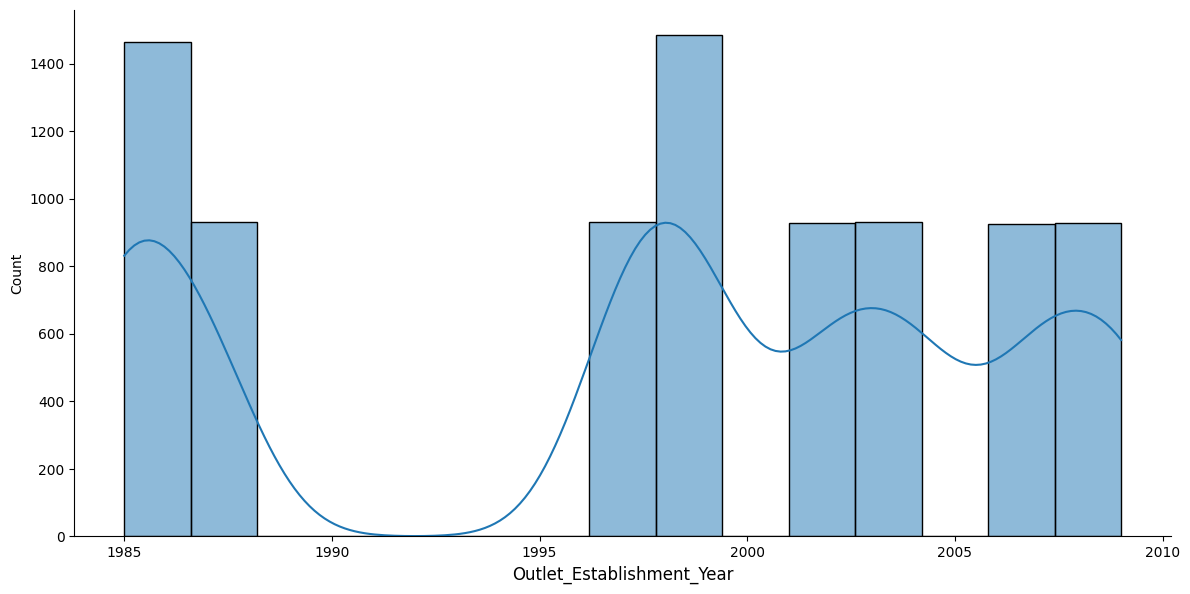

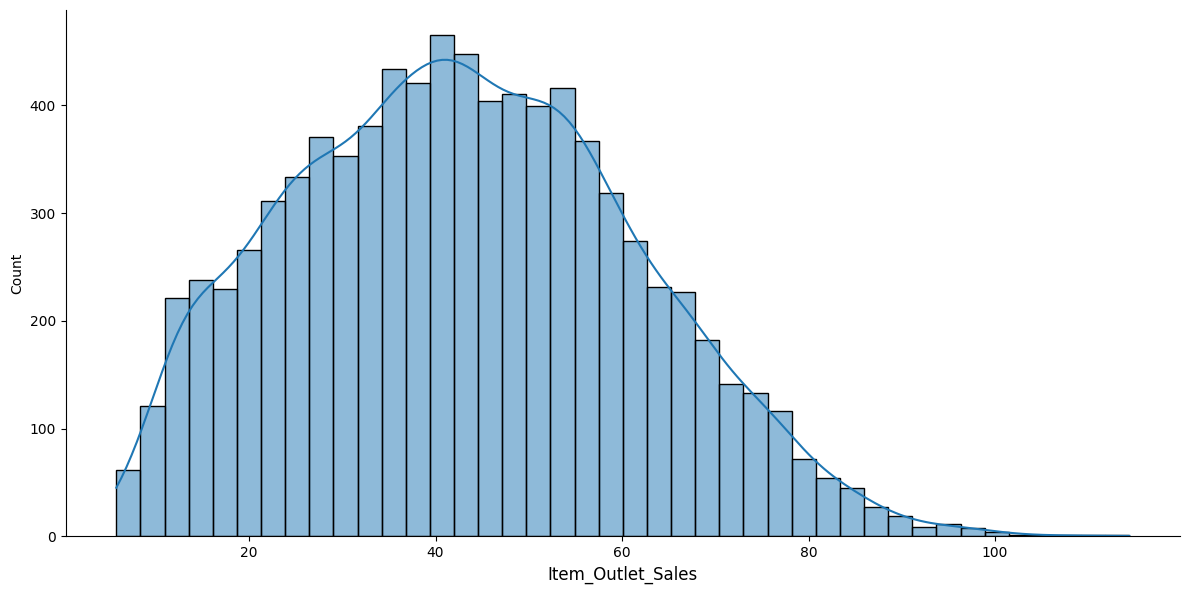

In [425]:
for i in numerical_train:
    sns.displot(data = df1, x = i, kde = True, aspect = 2, height = 6)
    plt.xlabel(i, fontsize = 12) 

<Axes: ylabel='Item_Weight'>

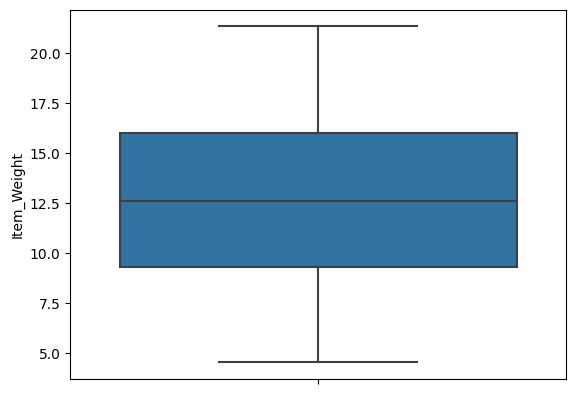

In [426]:
sns.boxplot(y=df1["Item_Weight"])

<Axes: xlabel='Item_Visibility'>

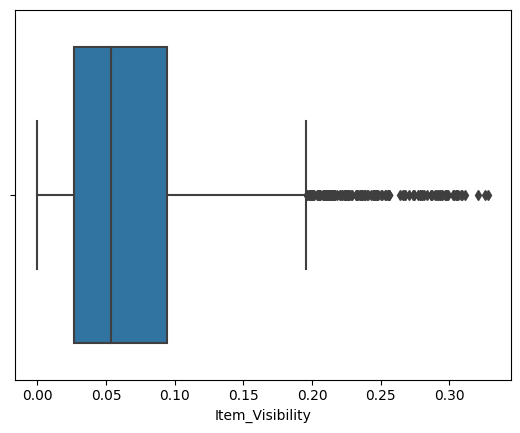

In [427]:
sns.boxplot(x=df1['Item_Visibility'])

<Axes: xlabel='Item_Visibility'>

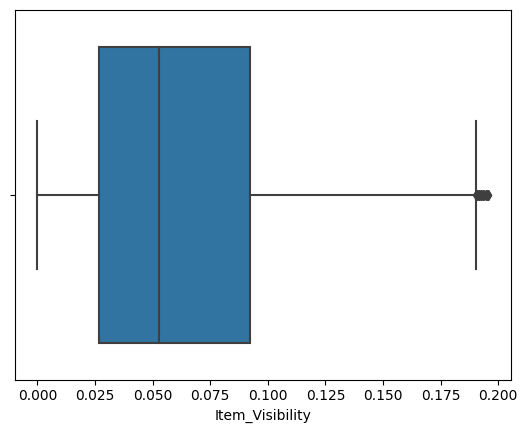

In [428]:
Q1=df['Item_Visibility'].quantile(.25)
Q3=df['Item_Visibility'].quantile(.75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
HL=Q3+(1.5*IQR)
data_no_outliers=df[(df['Item_Visibility']>LL)&(df['Item_Visibility']<HL)]
sns.boxplot(x=data_no_outliers['Item_Visibility']) 

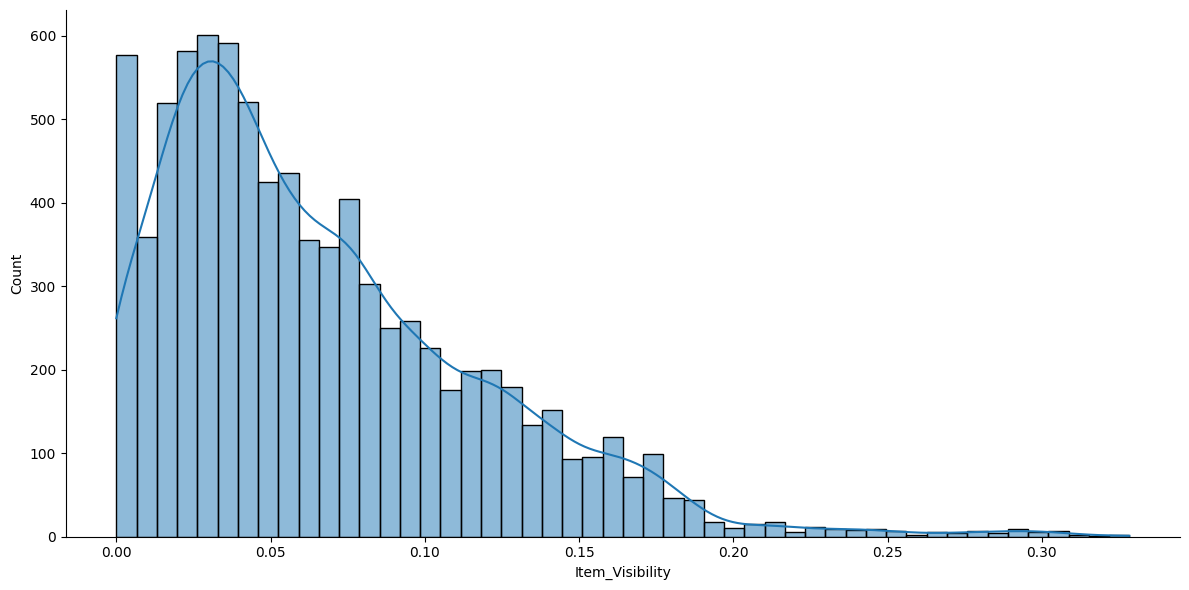

In [429]:
sns.displot(data = df1, x = 'Item_Visibility', kde = True, aspect = 2, height = 6)

## value of skewness and  Kurtosis

In [430]:
for i in numerical_train:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % df1[i].skew())
    print("Kurtosis: %f" % df1[i].kurt())
    print("-" * 20)



Item_Weight
--------------------
Skewness: 0.121845
Kurtosis: -0.858109
--------------------


Item_Visibility
--------------------
Skewness: 1.167091
Kurtosis: 1.679445
--------------------


Item_MRP
--------------------
Skewness: 0.127202
Kurtosis: -0.889769
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.396641
Kurtosis: -1.205694
--------------------


Item_Outlet_Sales
--------------------
Skewness: 0.234676
Kurtosis: -0.449294
--------------------


In [431]:
df1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        12.6               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          61.115775  
1  Supermarket Type2          21.057607  
2  Supermarket Type1          45.795961  
3      Grocery Store          27.062520  
4  Supermarket Type1          31.538947

In [432]:
df_copy=df1.copy()
df_copy

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998        12.6               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002        12.6               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          61.115775  
1     Supermarket Type2          21.057607  
2     Supermarket Type1          45.795961  
3         Grocery Store          27.062520  
4     Supermarket Type1          31.538947  
...                 ...                ...  
8518  Supermarket Type1          52.710373  
8519  Supermarket Type1          23.436830  
8520  Supermarket Type1          34.541477  
8521  Supermarket Type2          42.960419  
8522  Supermarket Type1          27.670743  

[8523 rows x 12 columns]

## Dropping of columns

In [433]:
df_copy.drop(columns='Item_Identifier',inplace=True)
df_copy.drop(columns='Outlet_Identifier',inplace=True)
df_copy.drop(columns='Outlet_Type',inplace=True)
df_copy.drop(columns='Outlet_Establishment_Year',inplace=True)
df_copy

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Size Outlet_Location_Type  Item_Outlet_Sales  
0     249.8092      Medium               Tier 1          61.115775  
1      48.2692      Medium               Tier 3          21.057607  
2     141.6180      Medium               Tier 1          45.795961  
3     182.0950        12.6               Tier 3          27.062520  
4      53.8614        High               Tier 3          31.538947  
...        ...         ...                  ...                ...  
8518  214.5218        High               Tier 3          52.710373  
8519  108.1570        12.6               Tier 2          23.436830  
8520   85.1224       Small               Tier 2          34.541477  
8521  103.1332      Medium               Tier 3          42.960419  
8522   75.4670       Small               Tier 1          27.670743  

[8523 rows x 8 columns]

### Encoding Categorical Variables


1). Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.
2). In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).

## Apply label encoding to a categorical column

In [434]:
df_new= df_copy.copy()
df_new['Outlet_Size'] = df_new['Outlet_Size'].astype(str)


In [435]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_new['Item_Fat_Content'] = label_encoder.fit_transform(df_new['Item_Fat_Content'])
df_new['Item_Type'] = label_encoder.fit_transform(df_new['Item_Type'])
df_new['Outlet_Size'] = label_encoder.fit_transform(df_new['Outlet_Size'])
df_new['Outlet_Location_Type'] = label_encoder.fit_transform(df_new['Outlet_Location_Type'])


In [532]:
df_new

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Size  Outlet_Location_Type  Item_Outlet_Sales  
0               2                     0          61.115775  
1               2                     2          21.057607  
2               2                     0          45.795961  
3               0                     2          27.062520  
4               1                     2          31.538947  
...           ...                   ...                ...  
8518            1                     2          52.710373  
8519            0                     1          23.436830  
8520            3                     1          34.541477  
8521            2                     2          42.960419  
8522            3                     0          27.670743  

[8523 rows x 8 columns]

##  Independent variables

In [582]:
x=df_new.drop('Item_Outlet_Sales',axis=1).astype('float')
x

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300               1.0         0.016047        4.0  249.8092   
1           5.920               2.0         0.019278       14.0   48.2692   
2          17.500               1.0         0.016760       10.0  141.6180   
3          19.200               2.0         0.000000        6.0  182.0950   
4           8.930               1.0         0.000000        9.0   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865               1.0         0.056783       13.0  214.5218   
8519        8.380               2.0         0.046982        0.0  108.1570   
8520       10.600               1.0         0.035186        8.0   85.1224   
8521        7.210               2.0         0.145221       13.0  103.1332   
8522       14.800               1.0         0.044878       14.0   75.4670   

      Outlet_Size  Outlet_Location_Type  
0             2.0                   0.0  
1             2.0                   2.0  
2             2.0                   0.0  
3             0.0                   2.0  
4             1.0                   2.0  
...           ...                   ...  
8518          1.0                   2.0  
8519          0.0                   1.0  
8520          3.0                   1.0  
8521          2.0                   2.0  
8522          3.0                   0.0  

[8523 rows x 7 columns]

## dependent variable 

In [583]:
y=df_new[['Item_Outlet_Sales']].astype('float')
y.head()

Item_Outlet_Sales
0          61.115775
1          21.057607
2          45.795961
3          27.062520
4          31.538947

## Scaling the Dataset

## MINMAX SCALER

In [535]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)
y1 = scaler.fit_transform(y)
x = pd.DataFrame(data = x1, columns = x.columns).astype(float)
y = pd.DataFrame(data = y1, columns = y.columns).astype(float)
print(x)
print(y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        0.282525              0.25         0.048866   0.266667  0.927507   
1        0.081274              0.50         0.058705   0.933333  0.072068   
2        0.770765              0.25         0.051037   0.666667  0.468288   
3        0.871986              0.50         0.000000   0.400000  0.640093   
4        0.260494              0.25         0.000000   0.600000  0.095805   
...           ...               ...              ...        ...       ...   
8518     0.137541              0.25         0.172914   0.866667  0.777729   
8519     0.227746              0.50         0.143069   0.000000  0.326263   
8520     0.359929              0.25         0.107148   0.533333  0.228492   
8521     0.158083              0.50         0.442219   0.866667  0.304939   
8522     0.610003              0.25         0.136661   0.933333  0.187510   

      Outlet_Size  Outlet_Location_Type  
0        0.666667                

## STANDARD SCALER

In [584]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
y1 = scaler.fit_transform(y)
x = pd.DataFrame(data = x1, columns = x.columns).astype(float)
y = pd.DataFrame(data = y1, columns = y.columns).astype(float)
print(x)
print(y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       -0.831187         -0.572844        -0.970732  -0.766479  1.747454   
1       -1.630810          0.978092        -0.908111   1.608963 -1.489023   
2        1.108727         -0.572844        -0.956917   0.658786  0.010040   
3        1.510904          0.978092        -1.281758  -0.291391  0.660050   
4       -0.918719         -0.572844        -1.281758   0.421242 -1.399220   
...           ...               ...              ...        ...       ...   
8518    -1.407246         -0.572844        -0.181193   1.371418  1.180783   
8519    -1.048835          0.978092        -0.371154  -1.716656 -0.527301   
8520    -0.523639         -0.572844        -0.599784   0.183698 -0.897208   
8521    -1.325628          0.978092         1.532880   1.371418 -0.607977   
8522     0.469975         -0.572844        -0.411936   1.608963 -1.052261   

      Outlet_Size  Outlet_Location_Type  
0        0.337853             -1.

#### standard scalar works better

## Train - Test Split 

In [585]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 7) (1705, 7) (6818, 1) (1705, 1)


In [586]:
x_train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
549     -0.783872          0.978092        -0.599405  -0.291391  0.487415   
7757     1.227014         -0.572844        -0.361643   0.421242  0.474526   
764      1.132384          0.978092         0.193620   0.658786 -0.470081   
6867    -1.061847         -0.572844        -0.703303  -0.291391 -1.595901   
2716     0.008654         -0.572844         1.377965   1.371418  0.233979   

      Outlet_Size  Outlet_Location_Type  
549      0.337853             -1.369334  
7757    -1.374111             -0.138882  
764      1.193835             -1.369334  
6867    -1.374111             -0.138882  
2716     1.193835             -1.369334

In [587]:
y_train.head()

Item_Outlet_Sales
549            0.321608
7757           0.695504
764           -0.512065
6867          -1.420795
2716           1.201153

In [503]:
# Define the regressors and their respective parameter grids
regressors = {
    'LinearRegression': (LinearRegression(), {}),  # No hyperparameters to tune for Linear Regression
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'DecisionTree': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'SVM': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }),
    'Lasso': (Lasso(), {
        'alpha': [0.01, 0.1, 1.0]
    }),
    'Ridge': (Ridge(), {
        'alpha': [0.01, 0.1, 1.0]
    }), 
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5]
    }),
    'AdaBoost': (AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    })
}

## K Fold cross Validation

In [504]:


# Define the number of splits for K-Fold cross-validation
n_splits = 3

# Initialize KFold with the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform grid search for each regressor
for regressor_name, (regressor, param_grid) in regressors.items():
    print(f"Grid search for {regressor_name}:")
    
    # Initialize GridSearchCV with k-fold cross-validation
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(x, y)  
    
    # Print the best parameters found
    print("Best parameters:", grid_search.best_params_)
    
    # Calculate cross-validated scores
    scores = cross_val_score(grid_search.best_estimator_, x, y, cv=kf, scoring='neg_mean_squared_error')
    
    # Print cross-validated scores (convert to positive since scoring is negative mean squared error)
    print("Cross-validated scores (MSE):", -scores)
    print("Mean Cross-validated score (MSE):", -scores.mean())
    print()


Grid search for LinearRegression:
Best parameters: {}
Cross-validated scores (MSE): [0.64772256 0.64473125 0.64104478]
Mean Cross-validated score (MSE): 0.6444995283400213

Grid search for RandomForest:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validated scores (MSE): [0.34045723 0.34294399 0.36103428]
Mean Cross-validated score (MSE): 0.34814516906535725

Grid search for DecisionTree:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-validated scores (MSE): [0.39274924 0.40138686 0.44989087]
Mean Cross-validated score (MSE): 0.41467565963337966

Grid search for SVM:
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-validated scores (MSE): [0.42422701 0.42379409 0.43245956]
Mean Cross-validated score (MSE): 0.42682688633052185

Grid search for KNN:
Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Cross-validated scores (MSE): [0.46563741 0.45036934

## LINEAR REGRESSION

In [550]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [551]:
lr_predict = lr.predict(x_test)

In [552]:
yp = lr.predict(x_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.35011234820117765
Mean Squarred Error: 0.6336929183678996
RMSE: 0.7960483140914876
Mean Absolute Error : 0.6249705949186763


In [554]:
xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgb.fit(x_train, y_train)

predict = xgb.predict(x_test)

In [555]:
print("R2 Score:", r2_score(y_test, predict))
print("Mean Squarred Error:", mean_squared_error(y_test, predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predict)))

R2 Score: 0.6197458475037046
Mean Squarred Error: 0.3707784921746476
RMSE: 0.6089158334077441
Mean Absolute Error : 0.47062497890554267


## RANDOMFOREST REGRESSOR


In [556]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [557]:
rf_pred = rf.predict(x_test)

In [558]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: 0.6617694806643998
Mean Squarred Error: 0.3298020577643097
RMSE: 0.5742839522085827
Mean Absolute Error : 0.4371444374630279


## LASSO REGRSSOR

In [560]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)

Lasso(alpha=0.01)

In [561]:
lasso_pred = ls.predict(x_test)

In [562]:
print("R2 Score:", r2_score(y_test, lasso_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lasso_pred)))

R2 Score: 0.35038094103697415
Mean Squarred Error: 0.6334310186726254
RMSE: 0.7958837972170469
Mean Absolute Error : 0.624509984864781


## RIDGE REGRESSOR

In [568]:
rd = Ridge(alpha = 1)
rd.fit(x_train, y_train)

Ridge(alpha=1)

In [569]:
ridge_pred = rd.predict(x_test)

In [570]:
print("R2 Score:", r2_score(y_test, ridge_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,ridge_pred)))

R2 Score: 0.3501123535504679
Mean Squarred Error: 0.6336929131519099
RMSE: 0.7960483108153109
Mean Absolute Error : 0.6249727106273445


### Linear Regression gives best evaluation matrices

## Feature Importance

In [572]:
column_names = x.columns.tolist()
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({column_names[indices[f]]}): {feature_importances[indices[f]]}")

Feature ranking:
1. Feature 4 (Item_MRP): 0.47059350703635344
2. Feature 0 (Item_Weight): 0.18738273521888377
3. Feature 6 (Outlet_Location_Type): 0.15697158572472164
4. Feature 2 (Item_Visibility): 0.09604155469397034
5. Feature 5 (Outlet_Size): 0.06744709712732655
6. Feature 3 (Item_Type): 0.01757697407188083
7. Feature 1 (Item_Fat_Content): 0.003986546126863292


## Dimentionality Reduction

## PCA

In [600]:
x1=x.copy()

In [589]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x1= pca.fit_transform(x1)
x1

array([[ 1.20016271, -0.30446378,  0.4904007 , ..., -1.91890071,
        -1.19682579,  0.83557915],
       [-0.60467292, -0.03834254, -2.03181866, ..., -0.78765574,
         2.08986672, -1.01914247],
       [ 1.14186009, -1.38122596,  0.21207458, ...,  0.36170462,
         0.07357882,  0.78498402],
       ...,
       [ 0.90111935, -0.39689139, -1.28273419, ..., -0.06295633,
        -0.09063212, -0.71341008],
       [-0.47665791,  0.65033415, -0.6883977 , ...,  0.07413492,
         1.76357262, -1.13956973],
       [ 1.74910932, -1.48099702, -0.89980543, ...,  0.80532261,
         0.95513738,  0.12357269]])

In [590]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.20,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 7) (1705, 7) (6818, 1) (1705, 1)


In [591]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression()

In [592]:
lr_predict = lr1.predict(x_test)

In [593]:
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.35011234820117765
Mean Squarred Error: 0.6336929183678996
RMSE: 0.7960483140914876
Mean Absolute Error : 0.6249705949186763


### After PCA the highest score achieved is 79% RMSE Score Using Linear Regression

## Storing the Accurate Model

In [618]:
model= lr1

## Evaluating on new dataset

In [623]:
new_data = pd.read_csv("Test.csv")
new_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [624]:
new_data.dropna(inplace=True)

In [627]:

new_data.drop(columns='Item_Identifier',inplace=True)
new_data.drop(columns='Outlet_Identifier',inplace=True)
new_data.drop(columns='Outlet_Type',inplace=True)
new_data.drop(columns='Outlet_Establishment_Year',inplace=True)
new_data

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0          20.750          Low Fat         0.007565            Snack Foods   
5           9.800          Regular         0.063817  Fruits and Vegetables   
6          19.350          Regular         0.082602           Baking Goods   
13          4.785          Low Fat         0.092738                 Breads   
14         16.750               LF         0.021206            Hard Drinks   
...           ...              ...              ...                    ...   
5673        7.070          Low Fat         0.094053            Snack Foods   
5674       15.700          Low Fat         0.030704            Hard Drinks   
5675       13.000          Regular         0.070411            Snack Foods   
5676       10.500          Regular         0.013496            Snack Foods   
5677        7.600          Regular         0.142991          Starchy Foods   

      Item_MRP Outlet_Size Outlet_Location_Type  
0     107.8622      Medium               Tier 1  
5     117.1492       Small               Tier 1  
6      50.1034      Medium               Tier 3  
13    122.3098      Medium               Tier 1  
14     52.0298        High               Tier 3  
...        ...         ...                  ...  
5673  116.0834      Medium               Tier 3  
5674   43.2770       Small               Tier 1  
5675   63.4484      Medium               Tier 1  
5676  141.3154       Small               Tier 1  
5677  169.1448      Medium               Tier 3  

[3099 rows x 7 columns]

In [628]:
new_data['Outlet_Size'] = new_data['Outlet_Size'].astype(str)

In [629]:
label_encoder = LabelEncoder()
new_data['Item_Fat_Content'] = label_encoder.fit_transform(new_data['Item_Fat_Content'])
new_data['Item_Type'] = label_encoder.fit_transform(new_data['Item_Type'])
new_data['Outlet_Size'] = label_encoder.fit_transform(new_data['Outlet_Size'])
new_data['Outlet_Location_Type'] = label_encoder.fit_transform(new_data['Outlet_Location_Type'])


In [633]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(new_data)
x_new = pd.DataFrame(data = x_new, columns = new_data.columns).astype(float)
print(x_new)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        1.752917         -0.572696        -1.181556   1.354155 -0.522320   
1       -0.619170          0.985499         0.109068  -0.298951 -0.371553   
2        1.449636          0.985499         0.540045  -1.715899 -1.459991   
3       -1.705564         -0.572696         0.772602  -1.479741 -0.287774   
4        0.886401         -2.130891        -0.868570  -0.062793 -1.428717   
...           ...               ...              ...        ...       ...   
3094    -1.210567         -0.572696         0.802776   1.354155 -0.388855   
3095     0.658941         -0.572696        -0.650672  -0.062793 -1.570812   
3096     0.074042          0.985499         0.260351   1.354155 -1.243345   
3097    -0.467530          0.985499        -1.045464   1.354155  0.020767   
3098    -1.095754          0.985499         1.925586   1.826472  0.472556   

      Outlet_Size  Outlet_Location_Type  
0       -0.266769             -1.

In [635]:
predictions=model.predict(x_new)
print(predictions)

[[ 0.00679913]
 [ 0.09709336]
 [ 0.51834063]
 ...
 [ 0.6308996 ]
 [-0.50533088]
 [ 0.27513592]]


## Saving the model

In [637]:
import pickle

with open('regressor_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Summary

**As we see from above code that the maximum accuracy obtained is by Linear Regression which is 79% RMSE score and thus we can say that even during hyper parameter tuning and cross validation the generated scores showed Linear regression as best model on this data**
**Evaluation of the output was done on new data that is Test.csv to check the output**

### Conclusion:
#### Linear regression is best fit model for given data (Null Hypothesis Satisfied)
#### Hypothesis Accepted: Supermarkets may experience higher sales compared to grocery stores or other types of outlets due to their larger inventory and variety of products.
#### Hypothesis Satisfied: Item Visibility: Items with higher visibility within the store may experience higher sales as they are more likely to catch the attention of shoppers.
#### Hypothesis accepted: Stores located in urban areas or areas with higher population density may experience higher sales due to higher foot traffic.
#### Hypothesis Accepted: Stores that have been established for a longer duration may have higher sales due to brand loyalty and customer trust.
#### Hypothesis Rejected: Higher the MRP more sales in various outlet